# Data Understanding

__We will now see the data and understand it better.__

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Reading in the data
df = pd.read_csv('bank_data.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


__Let us see which features are categorical and numerical in the data.__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

__We see that we have 10 numerical columns (5 int and 5 float) and 11 categorical columns (including the target variable). Let us explore and find the number of null values in each column.__

In [4]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

__We see that we have some null values in only 5 columns, namely: job, marital, education, default, housing and loan.__

__Before proceeding with the treating of these NaN values, let us fully understand the columns of the data. According to the source https://archive.ics.uci.edu/ml/datasets/Bank+Marketing tha attrinutes are as follows:__    
 - age (Age of the Customer) - Numerical
 - job (Type of Job) - Categorical - Possible Values - ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
 - marital (Marital Status) - Categorical - Possible Values - ( 'divorced','married','single','unknown'); NOTE: 'divorced' includes divorced and widowed
 - education (Education Level) - Categorical - Possible Values - ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
 - default (Has credit in Default) - Categorical - Possible Values - ('no','yes','unknown')
 - housing (Has Housing Loan) - Categorical - Possible Values - ('no','yes','unknown')
 - loan (Has Personal Loan) - Categorical - Possible Values - ('no','yes','unknown')
 - contact (Type of Communication) - Categorical - Possible Values - ('cellular','telephone')
 - month (Month of Last Contact) - Categorical - Possible Values - ('jan', 'feb', 'mar', ..., 'nov', 'dec')
 - day_of_week (Day of Week of Last Contact) - Categorical - Possible Values - ('mon','tue','wed','thu','fri')
 - duration (Last Contact Duration in seconds) - Numerical; IMPORTANT NOTE = (If duration=0, y="No')
 - campaign (Number of Contacts performed during this campaign for this client) - Numerical
 - pdays (Number of days passed after client was contacted from a previous campaign ; 999 - Not Previously Contacted)
 - previous (Number of contacts performed before this campaign and for this client) - Numerical
 - poutcome (Outcome of the previous marketing campaign) - Categorical Values - Possible Values - ('failure','nonexistent','success')
 - emp_var_rate (Quarterly Indicator of Employment Variation Rate) - Numerical
 - cons_price_idx (Monthly Indicator of Consumer Price Index) - Numerical
 - cons_conf_idx (Monthly Indicator of Consumer Confidence Index) - Numerical
 - euribor3m (Daily Indicator of Euribor 3 Month Rate) - Numerical
 - nr_employed (Quarterly Indicator of Number of Employees) - Numerical

 - y (Target Feature - Has the client subscribed to a term deposit) - Binary - Possible Values - ('yes','no')

 __We see that all the missong data are in categorical variables. Therefore, these missing values can't be imputed. Let us explore other aspects of the data and try to treat these missing values appropriately.__

In [5]:
# Defining a function to print the boxplots
def print_box(i, j, df, col, ax):
    ax[i, j].boxplot(df[col])
    ax[i, j].set_title('Column: {}'.format(col.upper()))

In [6]:
df_final = df.copy()

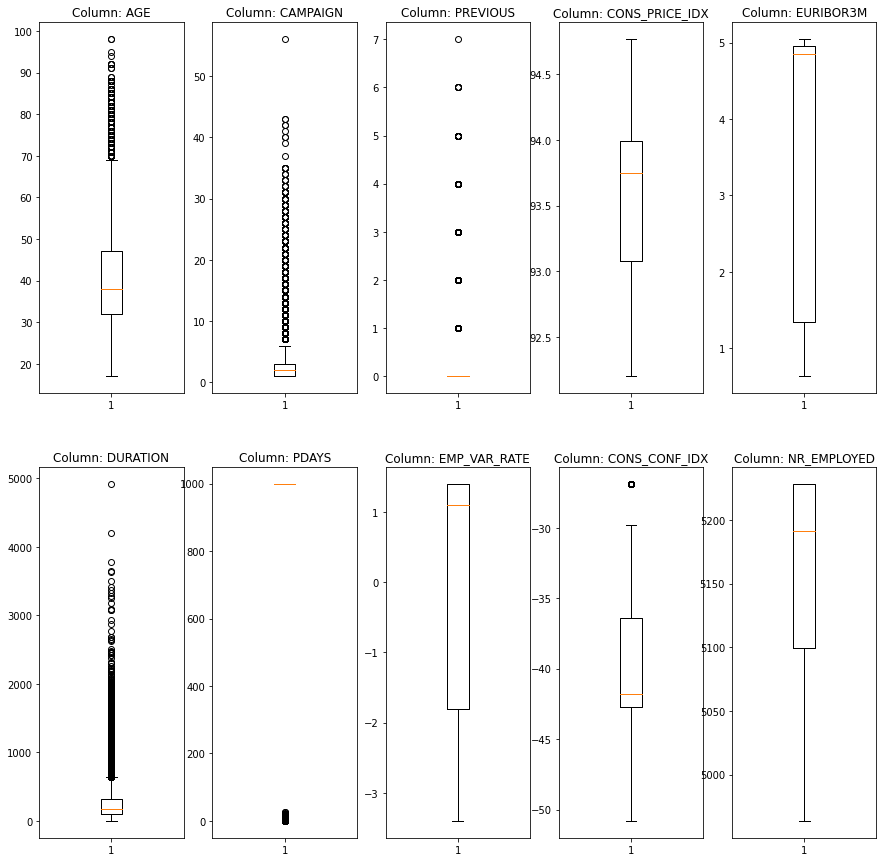

In [7]:
# Checking for outliers using boxplot
num_col_list = ['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed']
pos_list = [[0,0],[1,0],
            [0,1],[1,1],
            [0,2],[1,2],
            [0,3],[1,3],
            [0,4],[1,4]]
boxplots = []
fig, ax = plt.subplots(2, 5, figsize=(15,15))
for i in range(len(num_col_list)):
    print_box(pos_list[i][0], pos_list[i][1], df_final, num_col_list[i], ax)
# boxplots

__Now that we have some idea about the outliers, we can go ahead and decide what we want to do about the missing values in the categorical features. If we recall, the following columns had missing values:__    
- job - 330
- marital - 80
- education - 1731
- default - 8597
- housing - 990
- loan - 990

__Since we have 41176 rows in our data, removing the rows with NaN values in job, marital, housing and loan won't make too much of a difference. For the remaining 2 columns, let us see the split in values and get some more informtion before taking the decision.__

In [8]:
# Getting the value counts for the education column in the data
df_final.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [9]:
# Getting the value counts for the default coumn in the data
df_final.default.value_counts()

no     32588
yes        3
Name: default, dtype: int64

__We can see that for the default column, almost all the rows (except 3) have a value of 'no'. Therefore, we can just replace the missing values with 'no'. For the education column, things are spread out a little more. We see that 'university.degree' is the most common, but closely followed by 'high.school' and 'basic.9y'. Let us explore and see what happens if we replace all NaN values with 'university.degree'.__

In [10]:
# Replacing NaN values in education and default
values = {'education': 'university.degree', 'default': 'no'}
df_final.fillna(value=values, inplace=True)
df_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
# Dropping the columns with NaN values in the data
df_final.dropna(axis=0, how='any', inplace=True)
df_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
# Checking the number of duplicate rows in the data
df_final.duplicated().sum()

14

In [13]:
# Dropping the duplicate rows
df_final.drop_duplicates(inplace=True)
df_final.shape

(39789, 21)

__With still having 39789 rows of data, we can see that we haven't lost too much of data trying to tackle the missing values. If we look at the duplicates and null values now, we see that they are no duplicates and null values in any row of the dataset. This can be seen below.__

In [14]:
df_final.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [15]:
df_final.duplicated().sum()

0

__The last thing to look at is the class balance in the data.__

In [16]:
# Checking the class balance within the data
df_final.y.value_counts()

no     35303
yes     4486
Name: y, dtype: int64

__We see that most of the records present are 'no'. This means that we have a class imbalance in our data. This can be visualized below.__

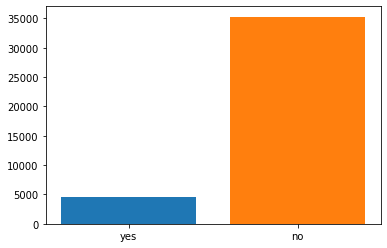

In [17]:
# Creating a scatter plot to show the imbalance in classes in the data
yes_ar = np.array(df_final[df_final.y == 'yes'].y)
no_ar = np.array(df_final[df_final.y == 'no'].y)
plt.bar(yes_ar, len(yes_ar))
plt.bar(no_ar, len(no_ar))
plt.show()

In [18]:
# Getting the event rate
evnt_rate = (len(yes_ar)/len(no_ar)*100)
evnt_rate

12.707135370931649

__We see that the event rate of 'yes' is around 12.7%. This shows a clear imbalance in the data. We must see how to deal with this imbalance in order to build efficient and effective models.__